FIBSEM Microscope Testing Notebook

- Testing Basic Functionality
    - Connection to Microscope
    - Image Acquisition
    - Image Data and Metadata 
    

Importing Modules and Utilities built for FIBSEM

In [1]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, acquire
import fibsem.alignment as fa
from fibsem.structures import BeamType, ImageSettings, GammaSettings, FibsemRectangle, FibsemImage
import matplotlib.pyplot as plt


Setting up connection to Microscope

In [2]:
# connect to microscope
microscope, microscope_settings = utils.setup_session()

2022-12-01 09:23:32,653 — root — INFO — connect:36 — Microscope client connecting to [10.0.0.1:7520]
Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]
2022-12-01 09:23:32,658 — root — INFO — connect:39 — Microscope client connected to [10.0.0.1:7520]
2022-12-01 09:23:32,659 — root — INFO — setup_session:278 — Finished setup for session: demo_2022-12-01.09-23-32AM


Setting up basic image settings for Ion Beam and Electron Beam
- image settings reduced is for a reduced area with parameters set up with a rectangle

In [3]:
# set gamma settings
gamma_settings = GammaSettings(
        enabled=True,
        min_gamma=0.5,
        max_gamma=1.8,
        scale_factor=0.01,
        threshold=46,
    )

# set imaging settings
image_settings_eb = ImageSettings(
        resolution=(1536,1024,
        dwell_time=1.0e-6,
        hfw=150.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=None,
    )


image_settings_ib = ImageSettings(
        resolution=(1536,1024),
        dwell_time=1.0e-6,
        hfw=150.0e-6,
        autocontrast=True,
        beam_type=BeamType.ION,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=None,
    )
rectangle = FibsemRectangle(0.1, 0.3, 0.4, 0.4)
THERMO_ENABLED = True
image_settings_eb_reduced = ImageSettings(
        resolution=(1536,1024),
        dwell_time=1.0e-6,
        hfw=150.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=rectangle.__to_FEI__() if THERMO_ENABLED else rectangle,
    )



Taking Images with Ion beam and Electron beam
- Checking Image settings
- Checking inherent metadata
    - Timestamp
    - Version (v1 at this stage)
- Checking data format
    - numpy array uint 8
- Plotting / Display image for check

2022-12-01 09:23:36,547 — root — INFO — acquire_image:212 — acquiring new ION image.
Image settings are the same
MicroscopeState(timestamp='12/01/2022 09:36:02', absolute_position=StagePosition(x=-0.015512833, y=0.05250325, z=0.023157054, t=1.1707575e-06, r=0.85526068, coordinate_system=Raw), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.012616823180611508, beam_current=5e-11, hfw=5e-05, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0165, beam_current=2e-11, hfw=0.00015, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None))
v1


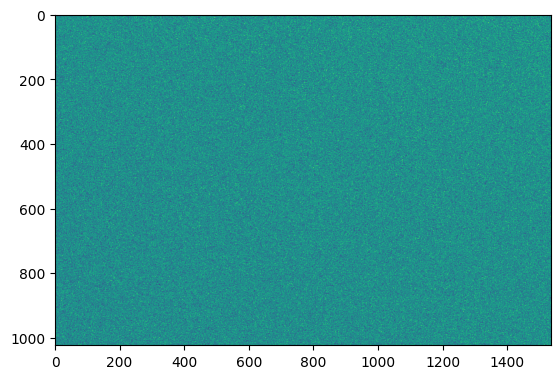

In [4]:
# take ion image
ib_image = acquire.new_image(microscope, image_settings_ib)

#checking image data
if ib_image.metadata.image_settings == image_settings_ib:
    print("Image settings are the same")
print(ib_image.metadata.microscope_state)
print(ib_image.metadata.version)


plt.imshow(ib_image.data)
plt.show()

In [7]:

gamma_settings.enabled = True
image_settings_eb = ImageSettings(
        resolution=(1536,1024),
        dwell_time=1e-6,
        hfw=2700.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=True,
        save_path="tests",
        label="label2",
        reduced_area=None,
    )


# take electron image
eb_image = acquire.new_image(microscope, image_settings_eb, None)

#checking image data 
if eb_image.metadata.image_settings == image_settings_eb:
    print("Image settings are the same")
#print(eb_image.metadata.microscope_state.timestamp)
print(eb_image.metadata)

#plt.imshow(eb_image.data,cmap='magma')
#plt.show()

## Saving metadata to image file ouput##



2022-12-01 09:24:51,203 — root — INFO — acquire_image:212 — acquiring new ELECTRON image.
Image settings are the same
FibsemImageMetadata(image_settings=ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.0027, autocontrast=True, beam_type=<BeamType.ELECTRON: 1>, save=True, label='label2', gamma=GammaSettings(enabled=True, min_gamma=0.5, max_gamma=1.8, scale_factor=0.01, threshold=46), save_path='tests', reduced_area=None), pixel_size=Point(x=1.7578125000000002e-06, y=1.7578125e-06), microscope_state=MicroscopeState(timestamp='12/01/2022 09:37:17', absolute_position=StagePosition(x=-0.015512833, y=0.05250325, z=0.023157054, t=1.1707575e-06, r=0.85526068, coordinate_system=Raw), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.012616823180611508, beam_current=5e-11, hfw=0.0027, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0165, beam_current=2e-11, hf

FibsemImageMetadata(image_settings=ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.0009651457961693737, autocontrast=True, beam_type=<BeamType.ION: 2>, save=True, label='label2', gamma=GammaSettings(enabled=True, min_gamma=0.5, max_gamma=1.8, scale_factor=0.01, threshold=46), save_path='tests', reduced_area=None), pixel_size=Point(x=6.28350127714436e-07, y=6.28350127714436e-07), microscope_state=MicroscopeState(timestamp='12/01/2022 09:36:08', absolute_position=StagePosition(), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.012616823180611508, beam_current=5e-11, hfw=5e-05, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0165, beam_current=2e-11, hfw=0.0009651457961693737, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None)), version='v1')


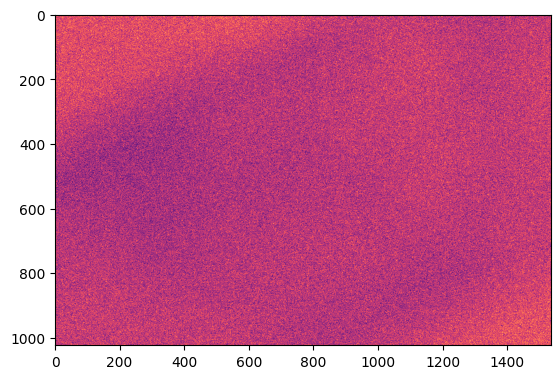

In [9]:
from fibsem import fibsemImage
img = fibsemImage.FibsemImage.load("tests\\label2_ib.tif")
plt.imshow(img.data,cmap='magma')
#plt.show()

print(img.metadata)
if img.metadata.microscope_state == eb_image.metadata.microscope_state:
    print("Metadata is the same")
#print(img.metadata)

2022-12-01 09:25:24,520 — root — INFO — acquire_image:212 — acquiring new ELECTRON image.
12/01/2022 09:37:49
v1


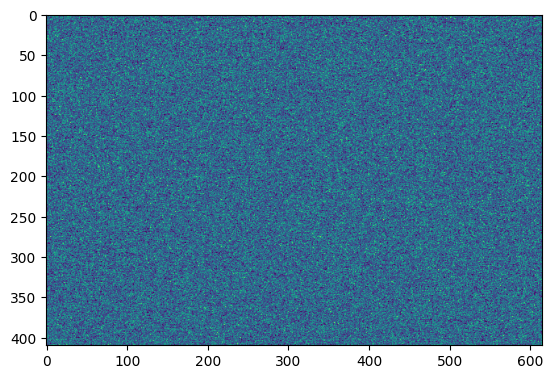

In [10]:
rectangle = FibsemRectangle(0.1, 0.1, 0.4, 0.4)
THERMO_ENABLED = True
image_settings_eb_reduced = ImageSettings(
        resolution=(1536,1024),
        dwell_time=1.0e-6,
        hfw=300.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=rectangle.__to_FEI__() if THERMO_ENABLED else rectangle,
    )

# take electron image with reduced area
eb_image = acquire.new_image(microscope, image_settings_eb_reduced, image_settings_eb_reduced.reduced_area)

#checking image data 
if eb_image.metadata.image_settings == image_settings_eb:
    print("Image settings are the same")
print(eb_image.metadata.microscope_state.timestamp)
print(eb_image.metadata.version)

plt.imshow(eb_image.data)
plt.show()

Last image function test

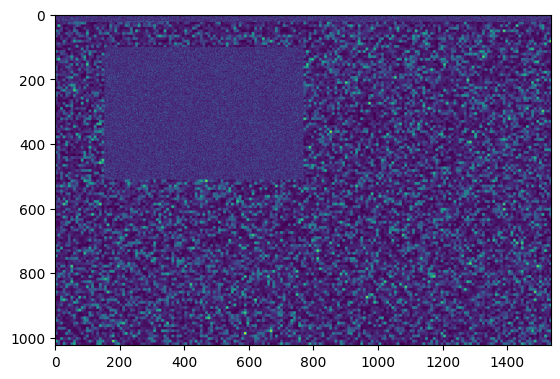

FibsemImageMetadata(image_settings=ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.0003, autocontrast=True, beam_type=<BeamType.ELECTRON: 1>, save=False, label='2022-12-01.09-27-13AM', gamma=GammaSettings(enabled=False, min_gamma=0.0, max_gamma=2.0, scale_factor=0.1, threshold=45), save_path='path', reduced_area=None), pixel_size=Point(x=1.9531249999999998e-07, y=1.9531249999999998e-07), microscope_state=MicroscopeState(timestamp='12/01/2022 09:37:49', absolute_position=StagePosition(x=-0.015512833, y=0.05250325, z=0.023157054, t=1.1707575e-06, r=0.85526068, coordinate_system=Raw), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.012616823180611508, beam_current=5e-11, hfw=0.0003, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0165, beam_current=2e-11, hfw=0.0009651457961693737, resolution='1536x1024', dwell_time=1e-06, stigmation=None, shift=None

In [12]:
#testing last image function
img = acquire.last_image(microscope)
plt.imshow(img.data)
plt.show()
print(img.metadata)

Taking set of reference images, now FibsemImages

2022-12-01 09:35:47,840 — root — INFO — acquire_image:215 — acquiring new ELECTRON image.
2022-12-01 09:36:03,378 — root — INFO — acquire_image:215 — acquiring new ION image.
2022-12-01 09:37:02,594 — root — INFO — acquire_image:215 — acquiring new ELECTRON image.
2022-12-01 09:37:05,383 — root — INFO — acquire_image:215 — acquiring new ION image.


AssertionError: hfw: 0.00015 != 0.0004

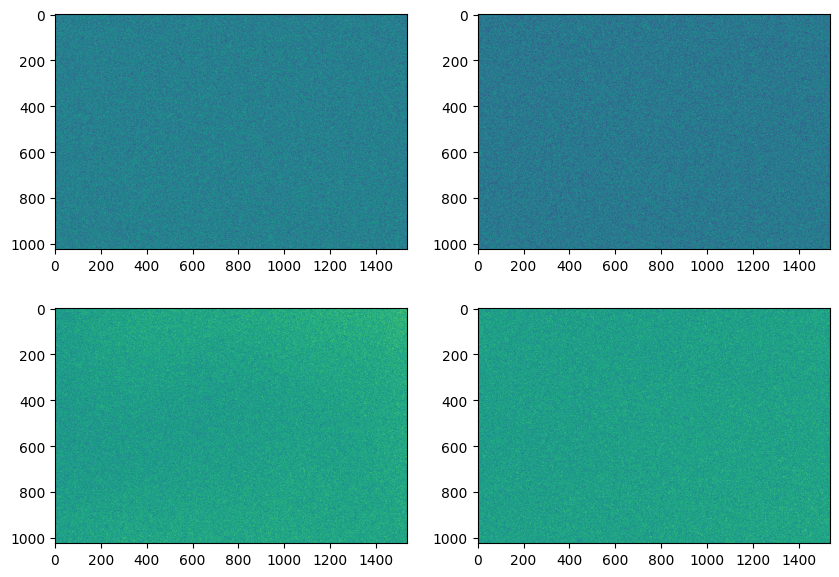

In [20]:
#taking set of ref images
hfws =  [400e-6, 150.0e-6]
ref_images = acquire.take_set_of_reference_images(microscope, image_settings_eb,hfws)
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2, 2, 1)
plt.imshow(ref_images.low_res_eb.data)
fig.add_subplot(2, 2, 2)
plt.imshow(ref_images.high_res_eb.data)
fig.add_subplot(2, 2, 3)
plt.imshow(ref_images.low_res_ib.data)
fig.add_subplot(2, 2, 4)
plt.imshow(ref_images.high_res_ib.data)

#checking image data 
# if ref_images..metadata.image_settings == image_settings_eb:
#     print("Image settings are the same")
# print(ref_images[0].metadata.microscope_state.timestamp)
# print(ref_images[0].metadata.version)


assert ref_images.low_res_eb.metadata.image_settings.hfw == hfws[0], f"hfw: {ref_images.low_res_eb.metadata.image_settings.hfw} != {hfws[0]}"
assert ref_images.low_res_ib.metadata.image_settings.hfw == hfws[0], f"hfw: {ref_images.low_res_ib.metadata.image_settings.hfw} != {hfws[0]}"
assert ref_images.high_res_eb.metadata.image_settings.hfw == hfws[1], f"hfw: {ref_images.high_res_eb.metadata.image_settings.hfw} != {hfws[1]}"
assert ref_images.high_res_ib.metadata.image_settings.hfw == hfws[1], f"hfw: {ref_images.high_res_ib.metadata.image_settings.hfw} != {hfws[1]}"


Testing beam alignment using reference image

In [ ]:
new_image = acquire.new_image(microscope, image_settings_eb, None)
fa.align_using_reference_images(microscope, microscope_settings, ref_images.high_res_eb, new_image )